In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json # will be needed for saving preprocessing details
import joblib # for saving algorithm and preprocessing objects
import random
import sys

In [101]:
df = pd.read_csv('water_potability.csv')

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [102]:
# import csv
# import random

# # Open the CSV file and read the rows into a list
# with open('water_potability.csv', 'r') as csvfile:
#     datareader = csv.reader(csvfile)
#     data = list(datareader)

# # Shuffle the rows using the random module
# random.shuffle(data)
# shuffled_df = pd.concat([header_row, data])
# # Write the shuffled data back to the CSV file
# with open('water_potability_shuffled_data.csv', 'w', newline='') as csvfile:
#     datawriter = csv.writer(csvfile)
#     datawriter.writerows(shuffled_df)

import pandas as pd

# load the CSV file into a DataFrame
df = pd.read_csv('water_potability.csv')

# separate the header row from the data rows
header_row = df.iloc[[0]]
data_rows = df.iloc[1:]

# shuffle the data rows without replacement
data_rows = data_rows.sample(frac=1).reset_index(drop=True)

# combine the shuffled data rows with the header row
shuffled_df = pd.concat([header_row, data_rows])

# write the shuffled DataFrame back to a CSV file
shuffled_df.to_csv('water_potability_shuffled_data.csv', index=False)


In [103]:
df = pd.read_csv('water_potability_shuffled_data.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,4.745764,186.303137,33153.81298,8.840474,370.167851,296.964102,14.784314,48.451375,3.699146,0
2,6.776879,189.438813,19663.79131,8.386404,375.457345,420.357392,14.831560,61.050420,3.322065,0
3,3.989032,216.076138,40175.20609,7.487423,309.800796,399.047181,11.186739,86.957464,4.409414,0
4,7.899452,210.734124,15896.36594,6.907203,319.886957,448.666423,18.169921,124.000000,2.853767,1


Exploratory Data Analysis

In [104]:
df.shape


(3276, 10)

In [105]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [107]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [108]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [109]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

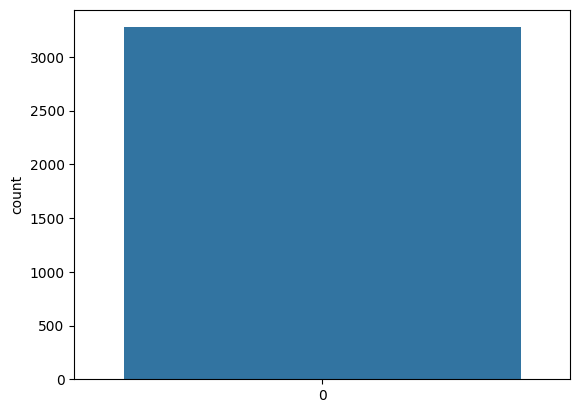

In [110]:
sns.countplot(df['Potability'])
plt.show()

C:\Users\omara\AppData\Local\Temp\ipykernel_12628\3057384885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ph'])


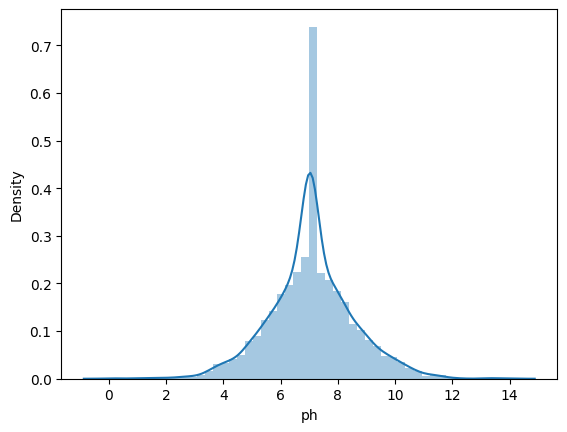

In [111]:
sns.distplot(df['ph'])
plt.show()

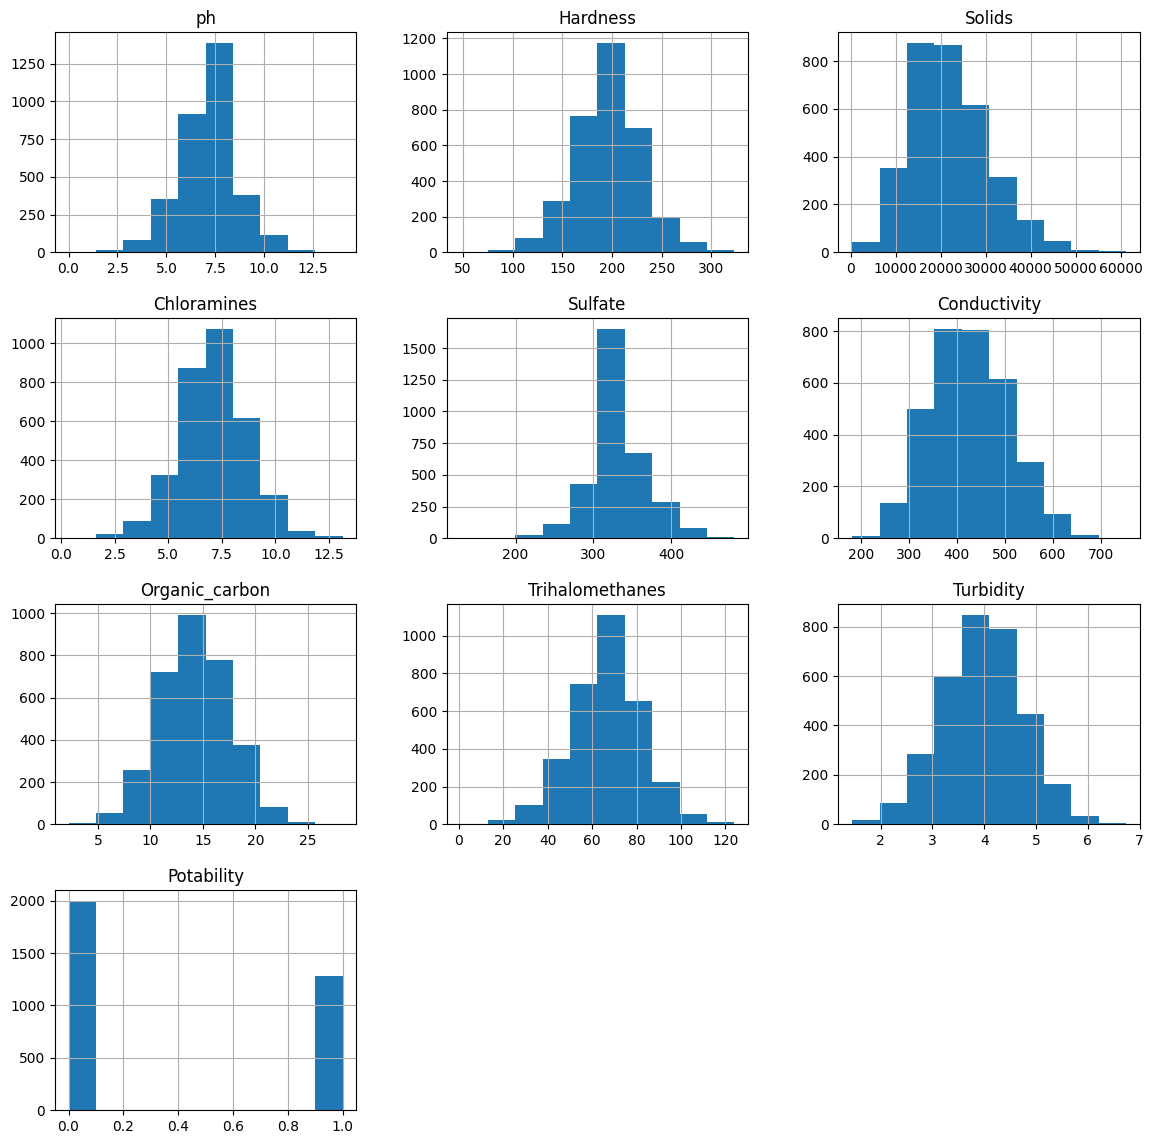

In [112]:
df.hist(figsize=(14,14))
plt.show()

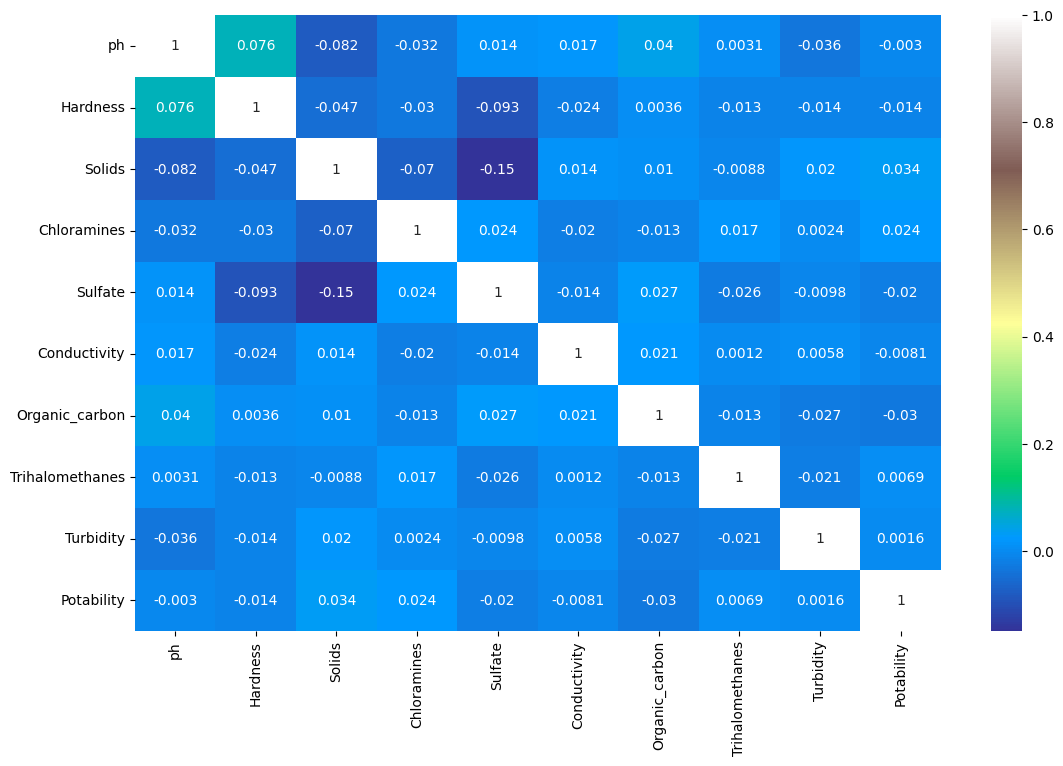

In [113]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

<Axes: >

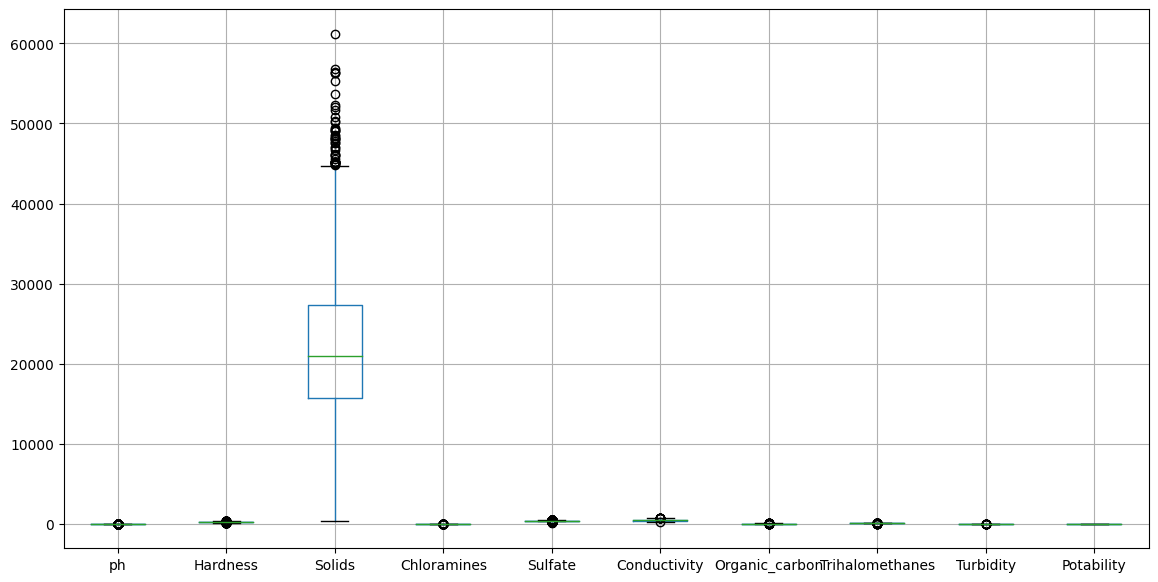

In [114]:
df.boxplot(figsize=(14,7))

In [115]:
X = df.drop('Potability',axis=1)
Y= df['Potability']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

Train Decision Tree Classifier and check accuracy

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [118]:
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

Accuracy Score = 59.45121951219512
Confusion Matrix =
 [[285 114]
 [152 105]]
Classification Report =
               precision    recall  f1-score   support

           0       0.65      0.71      0.68       399
           1       0.48      0.41      0.44       257

    accuracy                           0.59       656
   macro avg       0.57      0.56      0.56       656
weighted avg       0.58      0.59      0.59       656



In [119]:
res = dt.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])[0]
res

d:\gp project\water qulaity prediction\water_quality_prediction\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

Apply Hyper Parameter Tuning

In [120]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10,12,14]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [121]:
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")
    
print("Training Score:",grid_search_dt.score(X_train, Y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, Y_test)*100)

Best: 0.597 using {'criterion': 'entropy', 'min_samples_split': 2, 'splitter': 'best'}
0.588 (0.029) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.589 (0.027) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.582 (0.033) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.581 (0.038) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.586 (0.029) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.583 (0.030) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.588 (0.027) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.582 (0.021) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.592 (0.028) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.591 (0.032) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.596 (0.026) with: {'criterion': 'gini',

In [122]:
res = grid_search_dt.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])[0]
res

d:\gp project\water qulaity prediction\water_quality_prediction\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [123]:
# save preprocessing objects and dt algorithm
joblib.dump(X, "./X.joblib", compress=True)
joblib.dump(Y, "./Y.joblib", compress=True)
joblib.dump(dt, "./DecisionTreeClassifier.joblib", compress=True)
joblib.dump(grid_search_dt, "./GridSearchCV.joblib", compress=True)

['./GridSearchCV.joblib']